In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats

# Hasting Algo Example
We will first generate a quick test data set with two predictos and one target. Using this data set, we will try to estimate the weights.

In [28]:
n_samples = 100

np.random.seed(42) 
x1 = np.random.rand(n_samples) * 10 + 10*np.random.normal(loc=0, scale = 1, size = n_samples)
x2 = np.random.rand(n_samples) * 10 + 10*np.random.normal(loc=0, scale = 1, size = n_samples)

b0= 10
b1 = 13.2452
b2 = 5.414

y = b0 + b1*x1 + b2*x2 

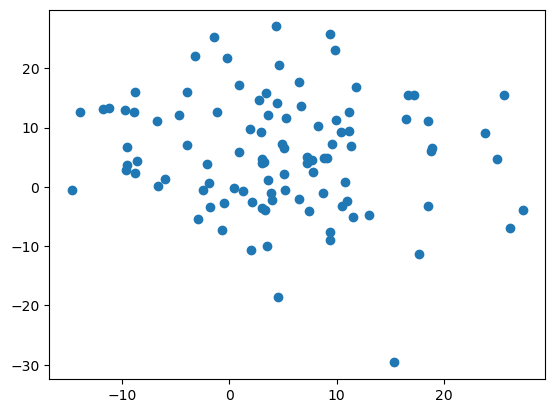

In [29]:
plt.scatter(x1,x2)

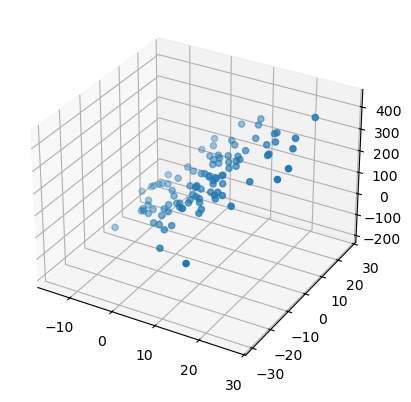

In [30]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.scatter3D(x1,x2,y)

In [31]:
np.random.normal(0,4,3)

array([-0.07405254, -1.15463456,  1.29087424])

In [32]:
import numpy as np
import scipy.stats as stats
from typing import List, Tuple

previous_proposals: List[Tuple[float, float]] = []
all_guesses = []
accepted_b0 = []
accepted_b1 = []
accepted_b2 = []
iterations = []

mu_b0 = 10      
mu_b1 = 8  
mu_b2 = 3    

sigma_b0 = 4    
sigma_b1 = 3     
sigma_b2 = 2     



def f(params):
    return params[0] + params[1]*x1 + params[2]*x2

# Function to calculate the prior
def calc_prior(estimates):
    b0, b1, b2 = estimates
    prior_b0 = stats.norm.pdf(b0, loc=mu_b0, scale=sigma_b0)  
    prior_b1 = stats.norm.pdf(b1, loc=mu_b1, scale=sigma_b1)  
    prior_b2 = stats.norm.pdf(b2, loc=mu_b2, scale=sigma_b2)  
    return prior_b0 * prior_b1 * prior_b2  

def calculate_likelihood(estimates):
    log_likelihood = np.sum(np.log(stats.norm.pdf(y - f(estimates), loc=0, scale=1)))
    return log_likelihood

def generate_guess():
    w0 = np.random.normal(mu_b0, sigma_b0)
    w1 = np.random.normal(mu_b1, sigma_b1)
    w2 = np.random.normal(mu_b2, sigma_b2)
    return np.array([w0, w1, w2])

def calc_posterior(estimates):
    log_prior = np.log(calc_prior(estimates))
    L = calculate_likelihood(estimates)  
    return L + log_prior  

def reject_or_accept(iteration):
    guess = generate_guess()  
    log_posterior_1 = calc_posterior(guess)
    log_posterior_0 = calc_posterior(previous_proposals[-1][0])

    log_posterior_ratio = log_posterior_1 - log_posterior_0
    u = np.log(np.random.uniform(0, 1)) 

    if log_posterior_ratio >= u:
        previous_proposals.append((guess, np.exp(log_posterior_1)))
        accepted_b0.append(guess[0])
        accepted_b1.append(guess[1])
        accepted_b2.append(guess[2])
        iterations.append(iteration)
        print("Proposal Accepted:", guess)
        all_guesses.append(list(guess) + [log_posterior_1])
    else:
        all_guesses.append(list(previous_proposals[-1][0]) + [log_posterior_0])
        
def run_sim(max_iterations=100000, threshold=0.001):  
    initial_guess = generate_guess()
    initial_posterior = np.exp(calc_posterior(initial_guess))
    previous_proposals.append((initial_guess, initial_posterior))
    all_guesses.append(initial_guess + [initial_posterior])
    
    accepted_b0.append(initial_guess[0])
    accepted_b1.append(initial_guess[1])
    accepted_b2.append(initial_guess[2])
    iterations.append(0)  
    iteration = 0 

    while iteration < max_iterations:
        reject_or_accept(iteration) 
        if len(previous_proposals) > 1:
            last_posterior = previous_proposals[-1][1]
            prev_posterior = previous_proposals[-2][1] 
            if abs(last_posterior - prev_posterior) / prev_posterior < threshold:
                print(f"Convergence reached after {iteration} iterations.")
                break
        
        iteration += 1  
        
    print(f"Simulation ended after {iteration} iterations.")
    print(f"Final accepted proposal: {previous_proposals[-1][0]} with posterior {previous_proposals[-1][1]}")

def plot_random_walk():
    plt.figure(figsize=(10, 6))
    
    plt.plot(iterations, accepted_b0, label="b0", marker="o", linestyle="--")
    plt.plot(iterations, accepted_b1, label="b1", marker="o", linestyle="--")
    plt.plot(iterations, accepted_b2, label="b2", marker="o", linestyle="--")

    plt.xlabel("Iteration")
    plt.ylabel("Parameter values")
    plt.title("Random Walk of Accepted Proposals")
    plt.legend()
    plt.grid(True)
    plt.show()

run_sim()



C:\Users\alexg\AppData\Local\Temp\ipykernel_18076\2697771526.py:34: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(np.log(stats.norm.pdf(y - f(estimates), loc=0, scale=1)))
C:\Users\alexg\AppData\Local\Temp\ipykernel_18076\2697771526.py:53: RuntimeWarning: invalid value encountered in scalar subtract
  log_posterior_ratio = log_posterior_1 - log_posterior_0
C:\Users\alexg\AppData\Local\Temp\ipykernel_18076\2697771526.py:84: RuntimeWarning: invalid value encountered in scalar divide
  if abs(last_posterior - prev_posterior) / prev_posterior < threshold:


Proposal Accepted: [ 4.71906717 13.4943763   5.35888024]
Proposal Accepted: [12.63812588 13.2995354   5.07721214]


C:\Users\alexg\AppData\Local\Temp\ipykernel_18076\2697771526.py:84: RuntimeWarning: divide by zero encountered in scalar divide
  if abs(last_posterior - prev_posterior) / prev_posterior < threshold:


Proposal Accepted: [10.29120718 13.13242563  5.46583717]
Proposal Accepted: [10.06210033 13.18926053  5.44322561]
Proposal Accepted: [ 9.90716573 13.2356322   5.38421982]
Proposal Accepted: [ 9.97522302 13.27659885  5.40524549]
Simulation ended after 100000 iterations.
Final accepted proposal: [ 9.97522302 13.27659885  5.40524549] with posterior 2.143004087901777e-46


In [7]:
previous_proposals[][0]

SyntaxError: invalid syntax (3227882003.py, line 1)

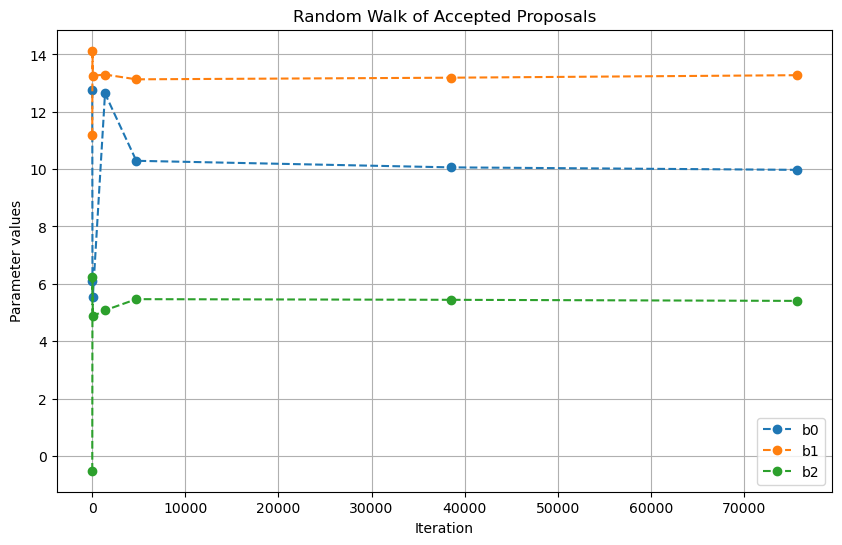

In [8]:
plot_random_walk()

C:\Users\alexg\AppData\Local\Temp\ipykernel_18076\2215387794.py:11: RuntimeWarning: divide by zero encountered in log
  likelihood[i, j] = np.sum(np.log(stats.norm.pdf(residuals, loc=0, scale=10)))


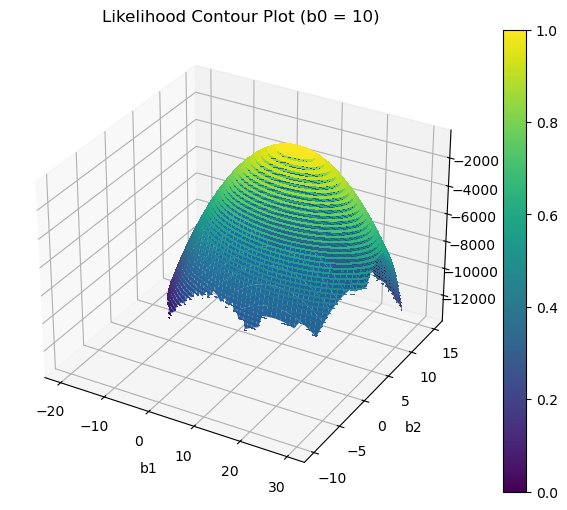

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_likelihood_contour(b1_values, b2_values, b0_fixed):
    likelihood = np.zeros((len(b1_values), len(b2_values)))
    
    for i, b1 in enumerate(b1_values):
        for j, b2 in enumerate(b2_values):
            estimates = [b0_fixed, b1, b2]
            residuals = y - f(estimates)
            likelihood[i, j] = np.sum(np.log(stats.norm.pdf(residuals, loc=0, scale=10)))
    
    return likelihood
    
def plot_likelihood_contour(b0_fixed=10, b1_range=(-20, 30), b2_range=(-10, 15), resolution=100):
    b1_values = np.linspace(b1_range[0], b1_range[1], resolution)
    b2_values = np.linspace(b2_range[0], b2_range[1], resolution)
    
    likelihood = calculate_likelihood_contour(b1_values, b2_values, b0_fixed)
    
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(1,1,1, projection = "3d")
    B1, B2 = np.meshgrid(b1_values, b2_values)
    contour = ax1.contourf(B1, B2, likelihood, levels=50, cmap="viridis")
    surface = ax1.plot_surface(B1, B2, likelihood)
    fig.colorbar(surface)
    
    plt.xlabel("b1")
    plt.ylabel("b2")
    plt.title(f"Likelihood Contour Plot (b0 = {b0_fixed})")
    plt.show()

# Run the contour plot for the likelihood
plot_likelihood_contour(b0_fixed=10)


In [12]:
import pandas as pd
df = pd.DataFrame(all_guesses)

In [32]:
df[3][df[3] == -np.inf] = 0

In [34]:
df.fillna(0, inplace=True)

In [14]:
calculate_likelihood_contour(b0_fixed=10, b1_values=(-20, 30), b2_values=(-10, 15))

C:\Users\alexg\AppData\Local\Temp\ipykernel_18076\2215387794.py:11: RuntimeWarning: divide by zero encountered in log
  likelihood[i, j] = np.sum(np.log(stats.norm.pdf(residuals, loc=0, scale=10)))


array([[-inf, -inf],
       [-inf, -inf]])

In [18]:
b0_fixed=10; b1_range=(-20, 30); b2_range=(-10, 15)
b1_values = np.linspace(b1_range[0], b1_range[1], 100)
b2_values = np.linspace(b2_range[0], b2_range[1], 100)
likelihood = calculate_likelihood_contour(b1_values, b2_values, b0_fixed)

C:\Users\alexg\AppData\Local\Temp\ipykernel_18076\2215387794.py:11: RuntimeWarning: divide by zero encountered in log
  likelihood[i, j] = np.sum(np.log(stats.norm.pdf(residuals, loc=0, scale=10)))


In [21]:
max = np.argmax(likelihood)

In [27]:
max_index= np.unravel_index(max, likelihood.shape)
b1_values[66]

13.333333333333336

In [25]:
b2_values[61]

5.404040404040405